In [1]:
import fileinput
import pyabc
import scipy.stats as ss
import numpy as np
from scipy.stats import norm
import scipy.stats as st
import tempfile
import os
from pyabc import ABCSMC
import re 
import subprocess
import sys as sys
import time
import pandas as pd
from abcpy.continuousmodels import Uniform
from abcpy.statistics import Identity
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nombres_parametros=["psin0","beta","theta","tauh0","delta","gama","tauk0","f0","fk0","alfa1","alfa2","alfa3","z0","b",
                    "sig","omega","iva0","g0","x0","px0","pwx0","omegae","be","sige","omegad","bd","sigd","xt0","pw0",
                    "pwm","ma","rho0","rm","a","meta","aran0","tauhk","taukk","ivak","arank","psim0","vr0","ifdi0",
                    "ir0","gk","ppet0","qpet0","share","epsilon","rentas","rcc","oabc","irb0","rrb0","alfaf","kf","alfah",
                    "kh","iri0","sigmatc","deltatc","gamac","gaman","gamam","gamav","pib0","pi0","alfay","alfapi","kbb",
                    "vbb","rr" ,"spread","spread2","deltav","kapa0","tauv0","psiv0","bv","sigv","omegav","taukv0","sltv",
                    "ppch","ltv0","chi0","act","mu","sdomeg0","rs0","lamdi","lamdv","rho1","rho2","rho3","rho4","rho5",
                    "rho6","rho7","rho8", "rho9", "rho10", "rho11", "rho12", "rho13" ,"rho14", "rho15", "rho16", "rho17", 
                    "rho18", "rho19", "rho20" , "rho21", "rho22", "rho23", "rho24", "rho25", "rho26", "cor1"]
nombres_resul=["c","n","w" ,   "ir" ,    "bf"  , "er","q" ,"i"     ,"ifdi"   ,"k","kfdi","kv","r","rfdi","fi","df",
               "py","y","g","d","m","s","x","pm","pd","px","xx","xt","pwx","pib","ri","tauh","tauk","f","fk","z","iva",
               "aran","dm","pi","vr","ppet","qpet","lamda","ga","po","v1","v2","iri","gb","rb","irb","tc","cb","ira","walras",
               "scc","sck","pw","iv","rv","pv","yv","yt","pt","taukv","kapa","ltv" ,"irh"   ,"ch" ,"tauv","rrb","psiv","psim" ,
               "psin" ,"u"   ,"pomeg", "omeg","rs","sdomeg" ,"chi"   ,"ct"]

In [3]:
##############################################################################
#Parámetros calibrados por el modelo de DSGE
##############################################################################
psin0 =  0.839925651   
beta = 0.966660992  
theta =  1.011289   
tauh0 =  0.13921   
delta = 0.942928263  
gama = 1.561073496  
tauk0 =  0.133974   
f0 = 0.760360883  
fk0 = 0.80712262  
alfa1 = 0.276098782  
alfa2 = 0.023635479  
alfa3 = 0.030266205  
z0 =  26.59720303   
b = 2.064665685  
sig = 1.5  
omega = 0.330468306  
iva0 = 0.123953184  
g0 = 3.946133413  
x0 = 1.88796393  
px0 = 1  
pwx0 = 1  
omegae = 0.226246806  
be = 1.451223777  
sige = 3  
omegad = 0.712316809  
bd = 2.413222496  
sigd = -2  
xt0 = 77.40652112  
pw0 = 1  
pwm = 0.972498643  
ma = 0.052631579  
rho0 = 0.5  
rm =  0.021307   
a = 0.061189212  
meta = 0.408404801  
aran0 = 0.02827907  
tauhk = 1  
taukk = 2  
ivak = 2  
arank = 2  
psim0 =  0.07377068   
vr0 = 0.036093325  
ifdi0 = 0.247142369  
ir0 =  1.06552350   
gk = 2  
ppet0 = 1  
qpet0 = 0.801901957  
share = 0.292740852  
epsilon = 20  
rentas = 1.832450981  
rcc = 0.476790463  
oabc = 0.037022972  
irb0 =  1.0570588   
rrb0 = 0.076836026  
alfaf = 1.2  
kf = 0.017660472  
alfah = 1.2  
kh = 0.040510778  
iri0 =  1.10215157   
sigmatc =  10.00000000   
deltatc =  1.44595993   
gamac =  0.57000000   
gaman =  2.50000000   
gamam =  2.00000000   
gamav =  5.00000000   
pib0 = 17.18740916  
pi0 =  1.0300000   
alfay =  0.5000000   
alfapi =  1.5000000   
kbb = -0.08470711  
vbb = -0.272727273  
rr  =  0.0270588   
spread = 0.036851467  
spread2 = 0.008464672  
deltav = 0.909317602  
kapa0 = 1  
tauv0 =  1.0000000   
psiv0 = 404.907184  
bv =  2.950827   
sigv = -2  
omegav = 0.796372447  
taukv0 = 1  
sltv = 0.500000000  
ppch = 0.403621206  
ltv0 = 0.700000000  
chi0 = 0.001725  
act = 0.957405739  
mu = 0  
sdomeg0 = 0.5  
rs0 = 0.115  
lamdi = 0.5  
lamdv = 0.75  

psin0 =  0.839925651   
beta = 0.966660992  
theta =  1.011289   
tauh0 =  0.13921   
delta = 0.942928263  
gama = 1.561073496  
tauk0 =  0.133974   
f0 = 0.760360883  
fk0 = 0.80712262  
alfa1 = 0.276098782  
alfa2 = 0.023635479  
alfa3 = 0.030266205  
z0 =  26.59720303   
b = 2.064665685  
sig = 1.5  
omega = 0.330468306  
iva0 = 0.123953184  
g0 = 3.946133413  
x0 = 1.88796393  
px0 = 1  
pwx0 = 1  
omegae = 0.226246806  
be = 1.451223777  
sige = 3  
omegad = 0.712316809  
bd = 2.413222496  
sigd = -2  
xt0 = 77.40652112  
pw0 = 1  
pwm = 0.972498643  
ma = 0.052631579  
rho0 = 0.5  
rm =  0.021307   
a = 0.061189212  
meta = 0.408404801  
aran0 = 0.02827907  
tauhk = 1  
taukk = 2  
ivak = 2  
arank = 2  
psim0 =  0.07377068   
vr0 = 0.036093325  
ifdi0 = 0.247142369  
ir0 =  1.06552350   
gk = 2  
ppet0 = 1  
qpet0 = 0.801901957  
share = 0.292740852  
epsilon = 20  
rentas = 1.832450981  
rcc = 0.476790463  
oabc = 0.037022972  
irb0 =  1.0570588   
rrb0 = 0.076836026  
alfaf = 1.2  
kf = 0.017660472  
alfah = 1.2  
kh = 0.040510778  
iri0 =  1.10215157   
sigmatc =  10.00000000   
deltatc =  1.44595993   
gamac =  0.57000000   
gaman =  2.50000000   
gamam =  2.00000000   
amav =  5.00000000   
pib0 = 17.18740916  
pi0 =  1.0300000   
alfay =  0.5000000   
alfapi =  1.5000000   
kbb = -0.08470711  
vbb = -0.272727273  
rr  =  0.0270588   
spread = 0.036851467  
spread2 = 0.008464672  
deltav = 0.909317602  
kapa0 = 1  
tauv0 =  1.0000000   
psiv0 = 404.907184  
bv =  2.950827   
sigv = -2  
omegav = 0.796372447  
taukv0 = 1  
sltv = 0.500000000  
ppch = 0.403621206  
ltv0 = 0.700000000  
chi0 = 0.001725  
act = 0.957405739  
mu = 0  
sdomeg0 = 0.5  
rs0 = 0.115  
lamdi = 0.5  
lamdv = 0.75    
rho1    = 0.95 
rho2    = 0.95 
rho3    = 0.95 
rho4    = 0.95 
rho5    = 0.95 
rho6    = 0.95 
rho7    = 0.95 
rho8    = 0.95 
rho9    = 0.95 
rho10   = 0.95 
rho11   = 0.95 
rho12   = 0.95 
rho13   = 0.95 
rho14   = 0.95 
rho15   = 0.95 
rho16   = 0.95 
rho17   = 0.95 
rho18   = 0.95 
rho19   = 0.95 
rho20   = 0.95 
rho21   = 0.95 
rho22   = 0.95 
rho23   = 0.95 
rho24   = 0.95 
rho25   = 0.95 
rho26   = 0.95 
cor1    = 0.95 
sigma   = 0.2222 
sigma=0.01 


In [4]:
def modificarParametro(Nombre,valor,path="/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/Modelo.mod"):
    """
    Modifica el valor del parámetro:Nombre y le asigna un valor:valor
    """
    
    reading_file = open(path, "r")
    new_file_content = ""
    for line in reading_file:
        i=0;ban=0
        stripped_line = line.strip()
        if "% 3. Model" in line: ban=1
        if Nombre in stripped_line and len(stripped_line)>5 and i<=300 and not "(" in stripped_line and stripped_line[0]==Nombre[0]:
            new_line = (Nombre+"	=	"+str(valor)+"	;\n")
        else: new_line=line
        new_file_content += new_line 
        i+=1
    reading_file.close()

    writing_file = open(path, "w")
    writing_file.write(new_file_content)
    writing_file.close()

In [5]:
def leeResultados(path="/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/Modelo.log"):
    """
    Lee los resultados del .log, retorna una lista con los valores en orden
    """
    outputs=[]
    reading_file = open(path, "r")
    for line in reading_file:
        stripped_line = line.split(" ")
        for Nombre in nombres_resul:
            if Nombre in stripped_line:
                
                valor=stripped_line[-1]
                outputs.append(float(valor[:-1]))
    reading_file.close()
    return outputs

In [6]:
observations=np.array([2.4613,-0.753888,2.96812,0.0635072,1.89486,4.31645e-05,-2.69418,0.495181,-1.39779,3.18936,1.29643, 2.16781,
       -1.85042,-2.4155,0.167302,1.83971,-0.000158626, 2.66616,1.37835,2.45202,1.39283, 1.92379, 0.637466, 
       4.31647e-05,-1.49684e-05,-0.000629016,4.32433,4.34907,-0.000672181, 2.84693, -3.08748,-1.97177,-2.01011,
      -0.273962, -0.21428,3.28081, -2.08785, -3.56563,0.792168,0.0295998, 0.0360933,0, -0.220769,-0.0514519,-0.329729,
      -0.000158626,3.27506,3.32651,0.0965813, -0.993837,-0.501141,0.0554903, 1.92162,-1.71271,0.0632964,-1.18277e-06,
       -0.117506,0.1196,0,-0.126481,-3.03959,-0.00104043,-0.126481,2.60295,-0.000101012,0,0,-0.356675, 0.11265,-0.0158172,0,
       -2.56608,6.00366, -2.60679, -0.174442,5.44566,-12.3016,-0.0435824,-2.16282,-12.2521, -6.36253,1.98499])


In [7]:
#########################################
#         Parámetros a estimar          #
#########################################



nombres_A_Estimar=["psin0","beta"]


Limits=[[0.838 ,0.85],[0.95,1.]]



In [8]:
#########################################
#          Definicion del Modelo        #
#########################################


def modelo(ValParametros,nombres_param=nombres_A_Estimar):
    for i in range(len(nombres_A_Estimar)):
        modificarParametro(nombres_param[i],ValParametros[i],path="/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/Modelo.mod")
    #Se debe indicar bien la forma correcta de llamar la finción de Matlab
    os.system("cd /usr/local/MATLAB/R2020b")
    #os.system("matlab -nojvm -nodisplay -nosplash - nodesktop")
    #subprocess.Popen(" addpath /usr/lib/dynare/matlab", shell=True, stdin=subprocess.PIPE,stdout=subprocess.PIPE, executable="/bin/bash").stdout.read()
    #subprocess.Popen(" dynare Modelo nostrict", shell=True,stdin=subprocess.PIPE, stdout=subprocess.PIPE, executable="/bin/bash").stdout.read()
    #os.system("matlab -nojvm -nodesktop -r 'try;/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/script.mod ; catch; end; quit'")
    #subprocess.Popen(" exit", shell=True,stdin=subprocess.PIPE, stdout=subprocess.PIPE, executable="/bin/bash").stdout.read()
    os.system("matlab -nodesktop -nosplash -r \"run('/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/script.m');exit\" | tail -n +11")  

    output=leeResultados(path="/home/jose/Study/Universidad/Cuarto Semestre/DSGE economy/Modelo.log")
    
    return np.array(output)


In [9]:
def distancia(output,observ):
    """"
    Dos listas con los outputs diferentes: modelado y estimado
    """
    distancia=np.abs(np.array(output)-np.array(observ))

    return np.sum(distancia)
    

In [10]:
#########################################
#          Método de ABC-rej            #
#########################################

def ABC_step(n_reps, nombres_A_Estimar=nombres_A_Estimar , error=10):
    """
    
    Hace un paso en el ABC, cada uno de n_reps repeticiones con la distancia definida en 
    distancia y por ahora con el Kernel de peso Identidad 
    
    
    """
    
    aceptados=[]
    resultados=[];distancias=[]
    for k in range(n_reps):
        estimados=[]
        out=[]
   
        for i in range(len(nombres_A_Estimar)):
            sup=Limits[i][1];inf=Limits[i][0]
            estimados.append(np.random.uniform(sup,inf))
            
        out=modelo(estimados)
        if not len(out)==0:
            resultados.append(out)
            dist=distancia(modelo(estimados),observations)
            if dist<=error: aceptados.append(estimados);distancias.append(dist)
        else: k-=1
        
    return aceptados,distancias




def ABC_tot(n_steps,n_reps,nombres_A_Estimar=nombres_A_Estimar):
    
    """
    
    Hace un paso en el ABC, cada uno de n_reps repeticiones con la distancia definida en 
    distancia y por ahora con el Kernel de peso Identidad 
    
    """
    
    result=[];dit=[]
    for i in range(n_steps):
        resul,dist=ABC_step(n_reps)
        if len(resul)==0: i-=1
        else:
            result.append(resul)
            dit.append(dist)
    
    parameters_estimados=np.mean(result,axis=0)
    distancias=np.mean(dit,axis=0)
    return parameters_estimados,dist

        
        
        
        
        


In [17]:
estimados,distancian=ABC_tot(15)

In [20]:
def infiere(estimados=estimados,distancian=distancian):
    for k in range(len(estimados[0])):
        vals=np.array([estimados[i][k] for i in range(len(estimados))])
        pesos=1/np.array(distancian)
        pond=np.average(vals,weights=pesos)
        print(pond)
        
infiere()

0.8429415732304385
0.9661337183201734


In [12]:
def Boostrapping(x):
    
    mu = np.mean(x)
    sigma = np.std(x)

    n_iteraciones = 100000
    n_alturas = len(x)
    promedios  = np.zeros(n_iteraciones)
    for i in range(n_iteraciones):
        nx = np.random.normal(loc=mu, scale=sigma, size=len(x))
        promedios[i] = np.mean(nx)
    Z = np.abs(promedios - np.mean(promedios))
    ii_outside = Z>(np.abs(mu - np.mean(promedios)))
    p_value = len(Z[ii_outside])
    p_value = p_value/n_iteraciones
    plt.figure()
    plt.hist(promedios, density=True, bins=30, label='Monte Carlo')
    plt.axvline(x=mu, color='red', label='Media')
    plt.title("Valor ABC = {} ".format(mu))
    plt.xlabel("Promedio")
    plt.ylabel("Densidad de Probabilidad")
    plt.legend()
    plt.savefig("prueba_hipotesis.png")


In [15]:
def scat(y,dist):
    fig,ax=plt.subplots()
    ax.scatter(y,dist)

[1.406484400946899, 0.539705974309999, 2.6962055002529994]
[[0.84997708 0.96178855]
 [0.84579377 0.96492966]
 [0.84043969 0.9561851 ]]


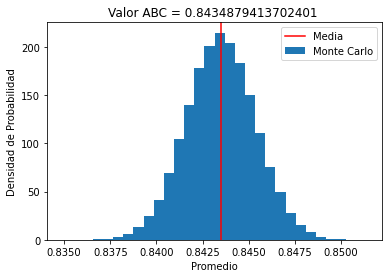

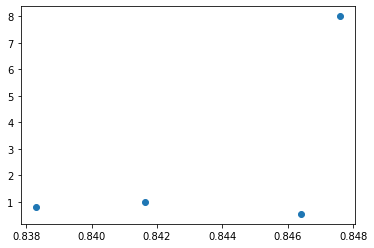

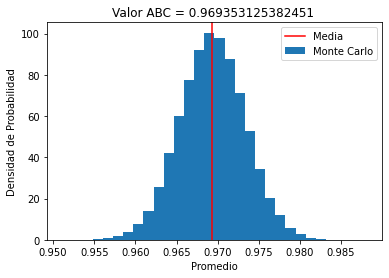

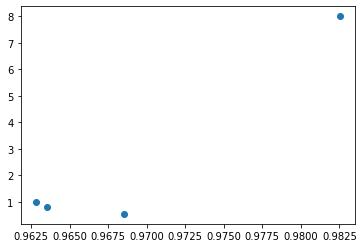

In [21]:
for par in range(len(nombres_A_Estimar)):
    x=[]
    for i in range(len(estimados)):
        x.append(estimados[i][par])
    Boostrapping(x)
    scat(x,distancian)